### 1. Tải và chuẩn bị dữ liệu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re

# Thiết lập style cho biểu đồ
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [4]:
def get_latest_processed_file():
    """Finds the most recently created file in the data/processed directory."""
    # ../data/processed because notebook is in notebooks/
    processed_dir = os.path.join('..', 'data', 'processed')
    list_of_files = glob.glob(os.path.join(processed_dir, '*.csv'))
    if not list_of_files:
        return None
    latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

latest_file = get_latest_processed_file()
if latest_file:
    print(f"Đang tải file: {latest_file}")
    df = pd.read_csv(
    latest_file,
    engine="python",
    on_bad_lines="skip"
)
else:
    print("Không tìm thấy file dữ liệu đã xử lý.")
    df = pd.DataFrame() # Create empty df to avoid errors

Đang tải file: ..\data\processed\processed_demo_data.csv


#### Xem qua dữ liệu

In [5]:
if not df.empty:
    display(df.head())

,title,company,salary,location,url,crawled_at,min_salary_raw,max_salary_raw,currency,min_salary_mil_vnd,max_salary_mil_vnd,avg_salary_mil_vnd
0,"Senior Python Developer (Django, Flask)",FPT Software,"Lên đến 2,500 USD",Hà Nội,https://example.com/job1,2026-01-19T10:00:00,NaN,2500.0,USD,NaN,62.5,62.5
1,Junior Java Developer,NashTech,8-15 triệu,Hồ Chí Minh,https://example.com/job2,2026-01-19T10:00:00,8.0,15.0,VND,8.0,15.0,11.5
2,Data Engineer (Big Data),Grab,20-40 triệu,Hồ Chí Minh,https://example.com/job3,2026-01-19T10:00:00,20.0,40.0,VND,20.0,40.0,30.0
3,ReactJS Developer (Mid-level),Tiki,Lên đến 35 triệu,Hồ Chí Minh,https://example.com/job5,2026-01-19T10:00:00,NaN,35.0,VND,NaN,35.0,35.0
4,Senior Golang Developer,Rikkeisoft,Lên đến 3000$,Đà Nẵng,https://example.com/job6,2026-01-19T10:00:00,NaN,3000.0,USD,NaN,75.0,75.0


In [6]:
if not df.empty:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               12 non-null     object 
 1   company             12 non-null     object 
 2   salary              12 non-null     object 
 3   location            12 non-null     object 
 4   url                 12 non-null     object 
 5   crawled_at          12 non-null     object 
 6   min_salary_raw      7 non-null      float64
 7   max_salary_raw      10 non-null     float64
 8   currency            12 non-null     object 
 9   min_salary_mil_vnd  7 non-null      float64
 10  max_salary_mil_vnd  10 non-null     float64
 11  avg_salary_mil_vnd  12 non-null     float64
dtypes: float64(5), object(7)
memory usage: 1.2+ KB


In [7]:
if not df.empty:
    df['avg_salary_mil_vnd'] = pd.to_numeric(df['avg_salary_mil_vnd'], errors='coerce')
    df.dropna(subset=['avg_salary_mil_vnd'], inplace=True)

    def classify_level(title):
        title = str(title).lower()
        if any(keyword in title for keyword in ['intern', 'thực tập']):
            return 'Intern'
        if any(keyword in title for keyword in ['junior']):
            return 'Junior'
        if any(keyword in title for keyword in ['senior']):
            return 'Senior'
        if any(keyword in title for keyword in ['manager', 'trưởng phòng', 'leader', 'lead']):
            return 'Manager/Lead'
        if any(keyword in title for keyword in ['middle', 'mid-level']):
            return 'Middle'
        return 'Not Specified'

    df['level'] = df['title'].apply(classify_level)

### 2. Phân tích và Trực quan hóa

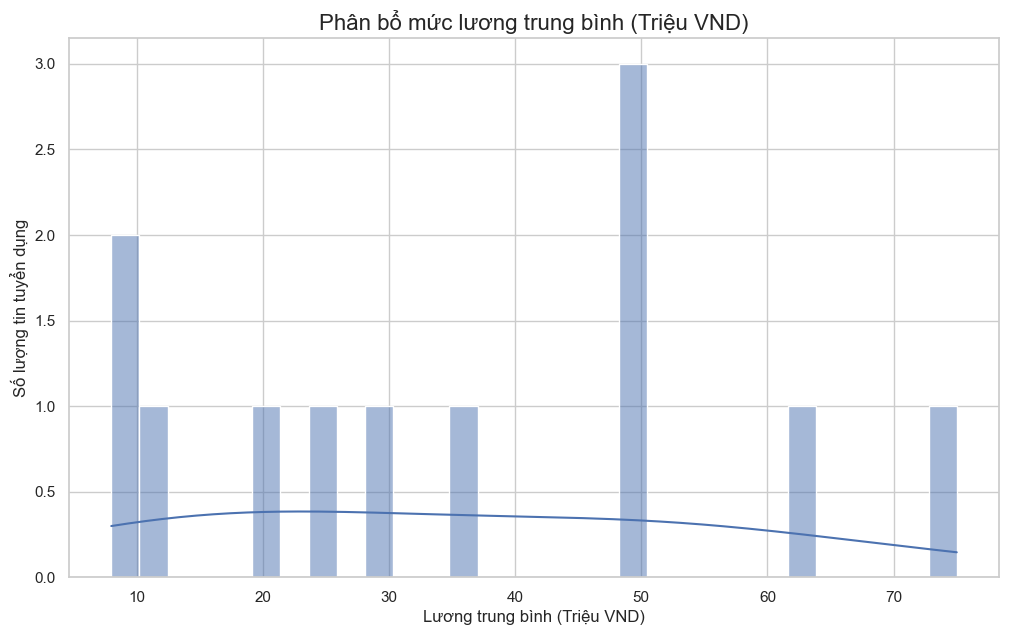

In [8]:
if not df.empty:
    salary_data = df['avg_salary_mil_vnd'][df['avg_salary_mil_vnd'] < 150] # Lọc outlier
    
    ax = sns.histplot(salary_data, bins=30, kde=True)
    ax.set_title('Phân bổ mức lương trung bình (Triệu VND)', fontsize=16)
    ax.set_xlabel('Lương trung bình (Triệu VND)')
    ax.set_ylabel('Số lượng tin tuyển dụng')
    plt.show()

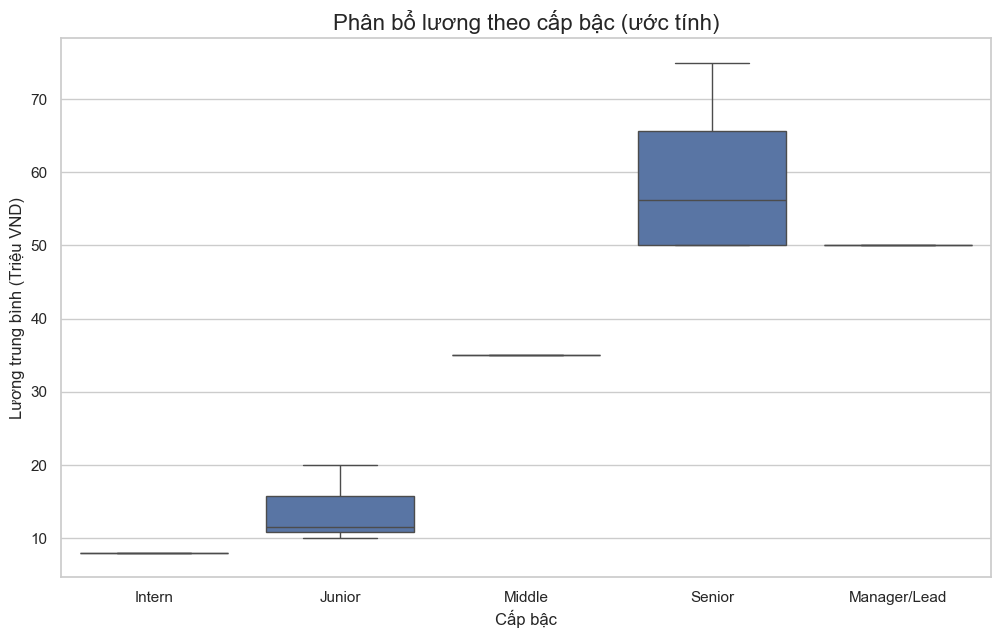

In [9]:
if not df.empty:
    level_order = ['Intern', 'Junior', 'Middle', 'Senior', 'Manager/Lead']
    filtered_df = df[df['level'] != 'Not Specified']
    
    ax = sns.boxplot(data=filtered_df, x='level', y='avg_salary_mil_vnd', order=level_order)
    ax.set_title('Phân bổ lương theo cấp bậc (ước tính)', fontsize=16)
    ax.set_xlabel('Cấp bậc')
    ax.set_ylabel('Lương trung bình (Triệu VND)')
    plt.show()

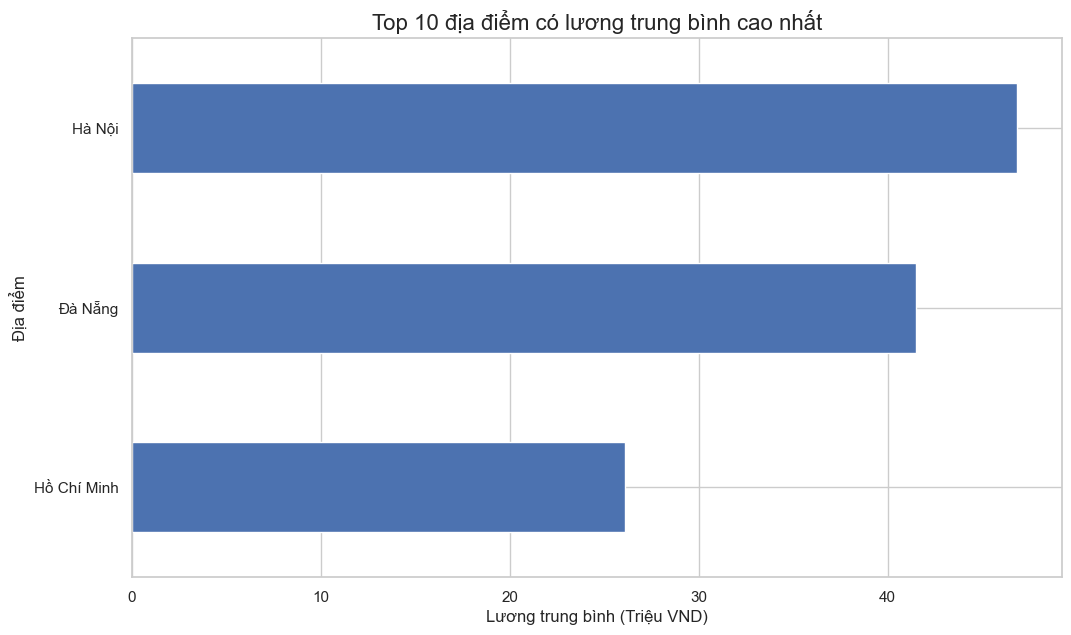

In [10]:
if not df.empty:
    df['location_clean'] = df['location'].str.split(',').str[0].str.strip()
    salary_by_location = df.groupby('location_clean')['avg_salary_mil_vnd'].mean().sort_values(ascending=False).head(10)
    
    ax = salary_by_location.plot(kind='barh')
    ax.set_title('Top 10 địa điểm có lương trung bình cao nhất', fontsize=16)
    ax.set_xlabel('Lương trung bình (Triệu VND)')
    ax.set_ylabel('Địa điểm')
    ax.invert_yaxis() # To show highest on top
    plt.show()